# Annulus different distributions

In [1]:
using Pkg
Pkg.activate("../../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var


WebIO._IJuliaInit()

In [3]:
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5
using FileIO

# 1. Load data 

In [4]:
# load points
results = load("data/annulus_different_distributions/two_circles.jld")
points = results["points"]
n_small = results["n_small"]
n_large = results["n_large"]

P = points[1:n_small,:] # points from small circle
Q = points[n_small+1:end, :]; # points from large circle

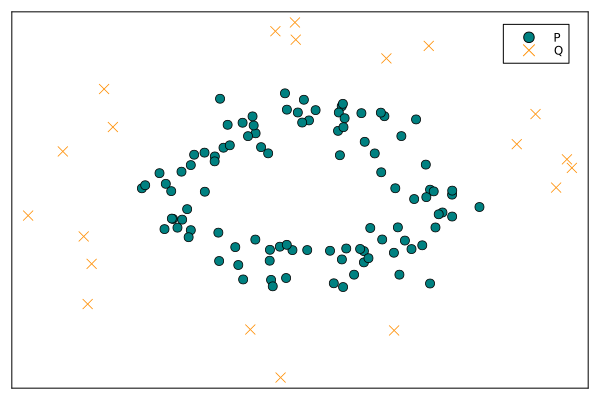

In [6]:
plot_P_Q(P, Q)

In [7]:
# compute distances among points
P_all = vcat(P, Q)
D = pairwise(Euclidean(), transpose(P_all), transpose(P_all), dims=2)

# Define submatrices 
D_P = D[1:n_small, 1:n_small]
D_Q = D[n_small+1:end, n_small+1:end]
D_P_Q = D[1:n_small, n_small+1:end]
    # rows (landmarks): P
    # columns (witness) : Q
D_Q_P = D[n_small+1:end, 1:n_small];
    # rows (landmarks): Q
    # columns (witness) : P

In [8]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);
#W_Q = compute_Witness_persistence(D_Q_P, maxdim = dim);

In [9]:
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
#barcode_W_Q = barcode(W_Q["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);

In [12]:
selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)

([8], 0.26090736827662403)

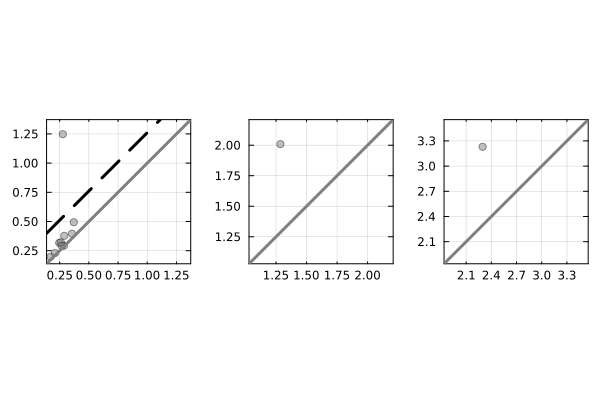

In [13]:
# plot all PD
p1 = plot_PD(barcode_VR_P, cutoff = cutoff_P)
p2 = plot_PD(barcode_W_P)
p3 = plot_PD(barcode_VR_Q)
plot(p1, p2, p3, layout = grid(1,3))

Run similarity-centric analogous bars at birthtime of witness cycle

In [14]:
extension_P, extension_Q = run_similarity_analogous_birthtime(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 1
                                            );

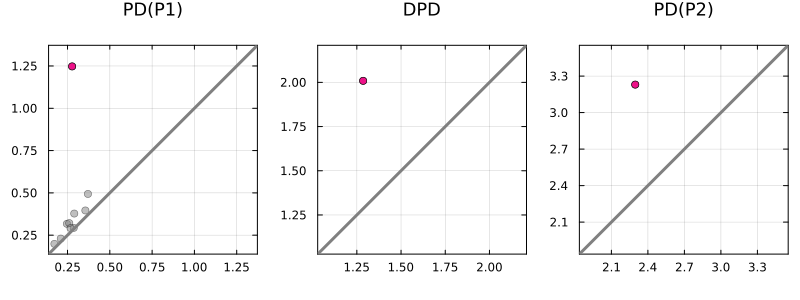

In [15]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 1

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

In [16]:
extension_P["Ybar_rep_tau"]

1-element Vector{Int64}:
 8

In [17]:
print(extension_Q["Ybar_rep_tau"])


[1]

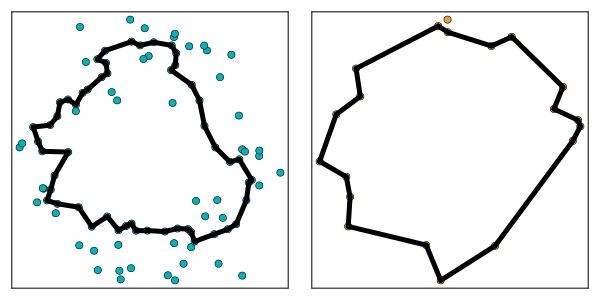

In [21]:
cr_P = get_cyclerep_Eirene(VR_P, 8)
cr_Q = get_cyclerep_Eirene(VR_Q, 1)

# plot cycles
p1 = plot_cycle_single(transpose(P), cycle = cr_P, c = "#00b4bc")
p2 = plot_cycle_single(transpose(Q), cycle = cr_Q, c = "#ee9c33")
plot(p1, p2, layout = grid(1,2), size = (600, 300))